In [67]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [68]:
model = TuringModel(size=50, dt=0.001, dx=0.25)
time_steps = 1000
b = np.arange(100, 40, -1)

# Load Simulation Snapshots

In [69]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/turing_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10 = data

# Linearisation

## Stability Without Diffusion

I numerically solved eigenvalues for $|I\sigma-J|=0$ and plotted the maximum real parts of the eigenvalues at each value of the parameter $b$.

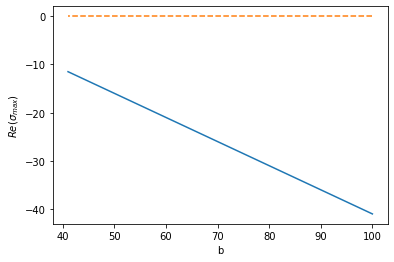

In [70]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, b, "b")

The maximum real part of the eigenvalues does not reach zero within this parameter range, thus the system remains linearly stable to small perturbations when diffusion is not present.

## Stability With Diffusion

I numerically solved eigenvalues for $|I\sigma-J+Dk^2|=0$, the disperal relation, and plotted the maximum real parts of the eigenvalues at a range of $k$ values at different $b$ levels.

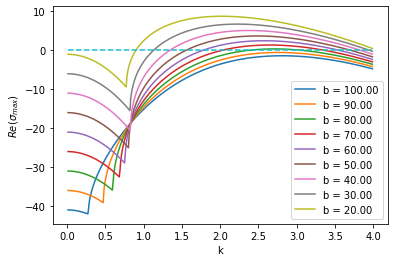

In [71]:
k = np.arange(0.01, 4, 0.01)
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, np.arange(100, 10, -10), "b", k)

In [72]:
turing_instability = find_bifurcation(model, 100, 50, -1, "b", tol=0, k=k)
print(f"Turing instability point at b = {turing_instability:.0f}")

Turing instability point at b = 84


The maximum eigenvalue real parts increase as $b$ decreases, with the peak at $b\approx2.5$. Diffusion-driven instability occurs when any of the eigenvalue real parts become positive for any $k$ value. Thus, pattern formation begins at $b=84$.

# Effects of Noise

## Additive Noise

I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [73]:
model.noise = "additive"
sigma = [0.01, 0.05, 0.25]

### $\sigma=0.01$

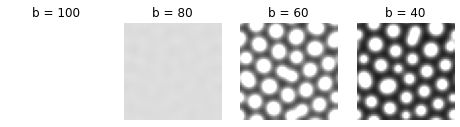

In [74]:
if not load:
    model.sigma = sigma[0]
    snapshots1 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots1, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.05$

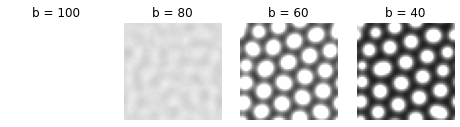

In [75]:
if not load:
    model.sigma = sigma[1]
    snapshots2 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots2, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.25$

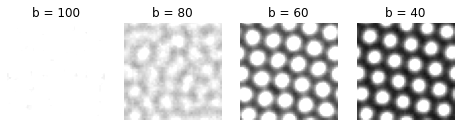

In [76]:
if not load:
    model.sigma = sigma[2]
    snapshots3 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots3, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

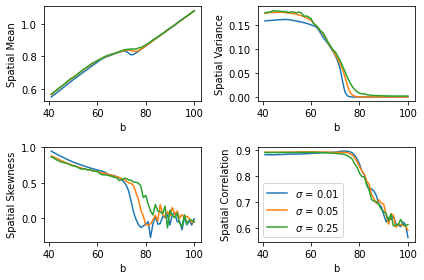

In [77]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "b", levels=sigma, level_name=r"$\sigma$", legend_loc=(1,1))

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [78]:
model.noise = "multiplicative"
sigma = [0.01, 0.1]

### $\sigma=0.01$

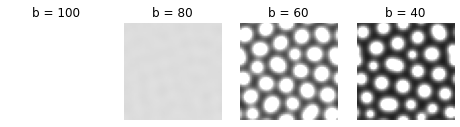

In [79]:
if not load:
    model.sigma = sigma[0]
    snapshots4 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots4, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

### $\sigma=0.1$

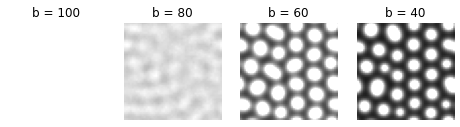

In [80]:
if not load:
    model.sigma = sigma[1]
    snapshots5 = parameter_change(model, b, "b", time_steps)
plot_snapshots(snapshots5, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

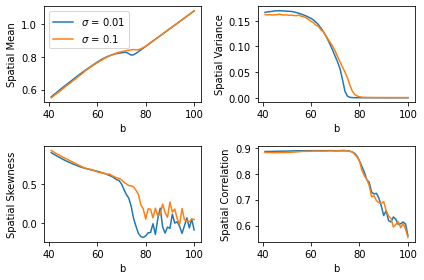

In [81]:
spatial_indicator_grid([snapshots4, snapshots5], "b", levels=sigma, level_name=r"$\sigma$")

## Observations

At low levels of noise, more time is required for pattern formation to occur after the Turing instability, hence the lag in the response in spatial mean and other indicators.

At higher levels of noise, pattern formation is induced by noise so that pattern onset begins earlier as the spatial mean deviates from the spatially homogeneous equilibrium earlier, resulting in a smoother transition instead of an abrupt jump.

The spatial indicators follow largely the same trends for each level of noise we simulated.

Spatial skewness is higher for higher levels of noise before the Turing instability point, as noise already causes gaps to appear.

There is no noticeable differences in spatial correlation between different levels of noise.

Spatial variance is slightly higher for higher levels of noise due to larger fluctuations around the equilibrium.

## Change in Noise

### Additive Noise

I simulated the model near the Turing instability point while slowly increasing the additive noise level.

In [82]:
noise = np.arange(0.05, 0.6, 0.01)
model.noise = "additive"
model.b = 80

if not load:
    snapshots6 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=30000)

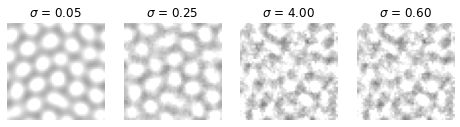

In [83]:
plot_snapshots(snapshots6, [0.05, 0.25, 4, 0.6], r"$\sigma$", vmin=0, vmax=1, precision=2)

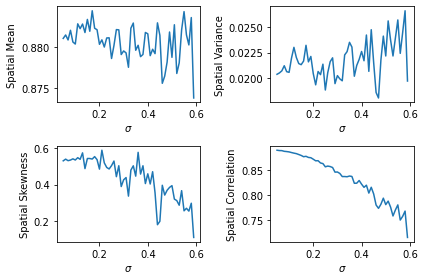

In [84]:
spatial_indicator_grid(snapshots6, r"$\sigma$")

### Multiplicative Noise

I simulated the model near the Turing instability point while slowly increasing the multiplicative noise level.

In [85]:
model.noise = "multiplicative"
noise = np.arange(0.05, 0.5, 0.01)

if not load:
    snapshots7 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=30000)

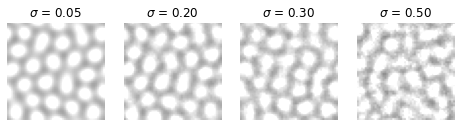

In [86]:
plot_snapshots(snapshots7, [0.05, 0.2, 0.3, 0.5], r"$\sigma$", vmin=0, vmax=1, precision=2)

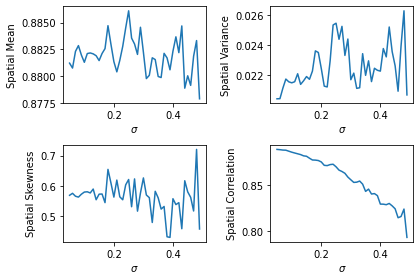

In [87]:
spatial_indicator_grid(snapshots7, r"$\sigma$")

## Observations

Spatial mean appeared to decrease as noise increased due to noise disturbing productivity of patterns.

Spatial variance appeared to increase as noise increased due to larger fluctuations.

Spatial skewness decreased as noise caused bare soil to have some vegetation.

Spatial correlation appeared to decrease as noise increases as noise weakened the regularity of the patterns.

Different levels of additive noise had a more pronouned effect on the spatial indicators than multiplicative noise.

# Duration of Run

I simulated the model just past the Turing instability point at different levels of noise for a large number of time steps.

In [88]:
model.b = 80
model.noise = "additive"
time_steps = 25000
sigma = [0.01, 0.05, 0.25]

## $\sigma=0.01$

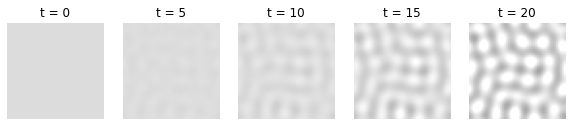

In [89]:
if not load:
    model.sigma = sigma[0]
    snapshots8 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots8 = snapshots8.iloc[::100]
plot_snapshots(snapshots8, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

## $\sigma=0.05$

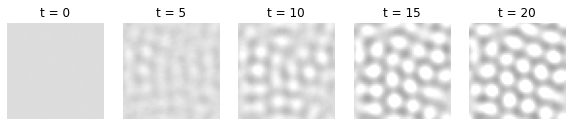

In [90]:
if not load:
    model.sigma = sigma[1]
    snapshots9 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots9 = snapshots9.iloc[::100]
plot_snapshots(snapshots9, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

## $\sigma=0.25$

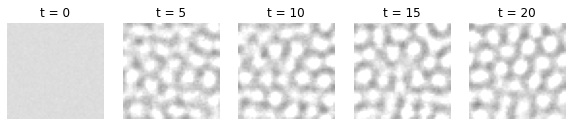

In [91]:
if not load:
    model.sigma = sigma[2]
    snapshots10 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots10 = snapshots10.iloc[::100]
plot_snapshots(snapshots10, [0, 5, 10, 15, 20], "t", vmin=0, vmax=1, precision=0)

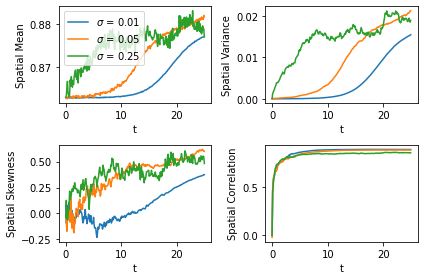

In [92]:
spatial_indicator_grid([snapshots8, snapshots9, snapshots10], "t", levels=sigma, level_name=r"$\sigma$")

When the level of noise is higher pattern formation occurs earlier.

# Spatial Spectral Properties

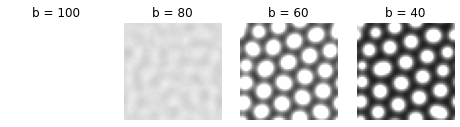

In [93]:
plot_snapshots(snapshots2, [100, 80, 60, 40], "b", vmin=0, vmax=1, precision=0)

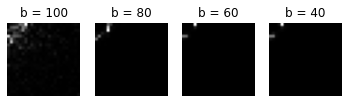

In [94]:
plot_power_spectra(snapshots2, [100, 80, 60, 40], "b", precision=0)

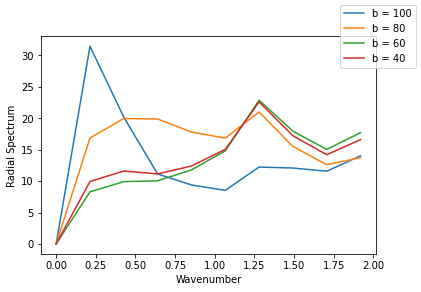

In [95]:
plot_radial_spectra(snapshots2, model.dx, [100, 80, 60, 40], "b")

I plotted the power spectra and radial spectra of the snapshots at different $b$ values. The power spectra exhibited a ring when patterns were present in the snapshot; this is shown by the peaks in the radial spectra at a particular wavenumber.

Note: The power and radial spectra have not been confirmed to be working.

# Homogeneous Equilibria

The homogeneous equilibria occur when diffusio is zero and local reaction rates are zero.

Thus,

$u(avu-e)=0$

$v(b-cu^2v)=0$

We get the trivial equilibrium

$u_0=0$

$v_0=0$

and the non-trivial equilibrium

$u_1=\frac{ab}{ce}$

$v_1=\frac{ce^2}{a^2b}$

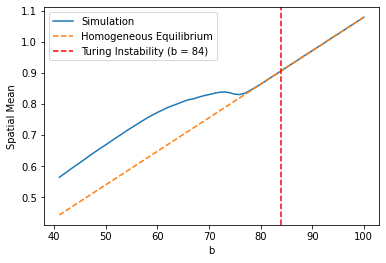

In [96]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots2, "mean", "b")
plot_equilibria(ax, model, b, "b")
ax.axvline(turing_instability, linestyle='--', color='red')
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Turing Instability (b = {turing_instability:.0f})"])

I plotted the simulation results against the homogeneous equilibria. The simulation closely followed the homogeneous equilibrium before pattern formation occurs.

I also plotted the Turing instability point at $b=84$ and observe that pattern formation occurs a while after. This lag is probably because only 1000 time steps ($t=1$) were simulated at each parameter step, which was not enough time to induce patterns.

Pattern formation causes the spatial mean to increase above the homogeneous equilibrium, due to increased productivity.

# Save Simulation Snapshots

In [97]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10)
    save_data('Results/turing_model.dat', data)